1. dataset académico

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 120  # número de estudiantes

df = pd.DataFrame({
    "asistencia": np.random.normal(85, 10, n).clip(60, 100),          # %
    "horas_estudio": np.random.normal(5, 2, n).clip(0, 12),           # hrs/semana
    "participacion_foro": np.random.poisson(3, n),                    # conteo
    "horas_pantalla": np.random.normal(6, 1.5, n).clip(1, 12),        # hrs/día
})

# Desempeño académico (influido por varias variables)
df["rendimiento"] = (
    0.4 * df["asistencia"]
    + 1.5 * df["horas_estudio"]
    + 1.0 * df["participacion_foro"]
    - 1.2 * df["horas_pantalla"]
    + np.random.normal(0, 5, n)
)

df.head()

,asistencia,horas_estudio,participacion_foro,horas_pantalla,rendimiento
0,89.967142,6.582064,1,7.930462,34.229125
1,83.617357,3.181225,0,5.333044,29.728413
2,91.476885,7.805589,4,5.358888,39.426234
3,100.000000,2.196298,1,5.171031,38.593296
4,82.658466,6.173714,6,7.445775,31.241062


2. Limpieza y revisión rápida

In [2]:
df.describe()

,asistencia,horas_estudio,participacion_foro,horas_pantalla,rendimiento
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,84.059402,5.142850,2.841667,5.894628,36.651494
std,8.889287,2.003397,1.874176,1.614101,8.115928
min,60.000000,0.949715,0.000000,2.010973,17.660161
25%,79.281247,3.482983,1.000000,4.794886,31.464819
50%,84.267720,5.371088,3.000000,5.865413,36.885349
75%,88.827862,6.324629,4.000000,6.958754,42.850737
max,100.000000,12.000000,9.000000,9.965357,57.388876


3. Correlaciones Pearson y Spearman (pandas)

In [4]:
corr_pearson = df.corr(method="pearson")
corr_spearman = df.corr(method="spearman")

corr_pearson

,asistencia,horas_estudio,participacion_foro,horas_pantalla,rendimiento
asistencia,1.000000,0.108974,0.122949,0.128563,0.554884
horas_estudio,0.108974,1.000000,0.213383,-0.029959,0.496104
participacion_foro,0.122949,0.213383,1.000000,0.051736,0.358893
horas_pantalla,0.128563,-0.029959,0.051736,1.000000,-0.180131
rendimiento,0.554884,0.496104,0.358893,-0.180131,1.000000


In [5]:
corr_spearman

,asistencia,horas_estudio,participacion_foro,horas_pantalla,rendimiento
asistencia,1.000000,0.105983,0.123045,0.134370,0.521649
horas_estudio,0.105983,1.000000,0.254594,-0.046253,0.479707
participacion_foro,0.123045,0.254594,1.000000,0.052817,0.355881
horas_pantalla,0.134370,-0.046253,0.052817,1.000000,-0.135162
rendimiento,0.521649,0.479707,0.355881,-0.135162,1.000000


4. Matriz de correlación + seaborn heatmap

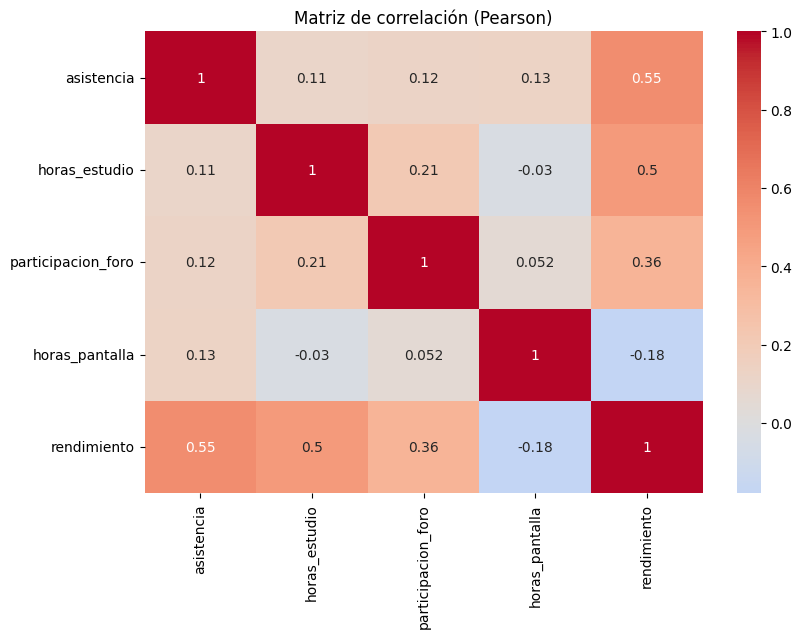

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (Pearson)")
plt.show()

5. Identifique outliers o relaciones no lineales y graficar ejemplos.

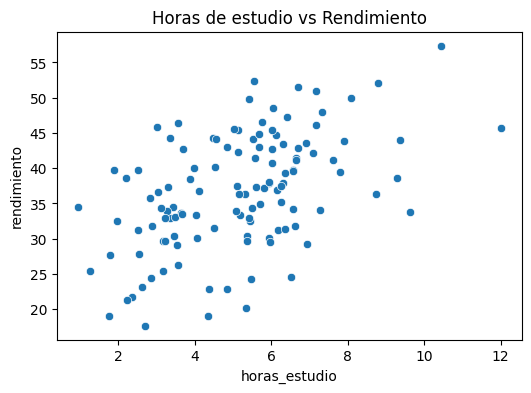

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="horas_estudio", y="rendimiento")
plt.title("Horas de estudio vs Rendimiento")
plt.show()

6. Use pingouin.partial_corr() para calcular correlación parcial entre al menos 3 variables.

In [10]:
#!pip install pingouin
import pingouin as pg

pg.partial_corr(
    data=df,
    x="horas_estudio",
    y="rendimiento",
    covar=["asistencia", "horas_pantalla"]
)

,n,r,CI95%,p-val
pearson,120,0.539364,"[0.4, 0.66]",2.943588e-10


7. Interprete resultados y explicar qué tipo de correlación es más útil según cada caso.

* r = 0.539

Correlación positiva moderada

* CI95% = [0.40, 0.66]

“Con un 95% de confianza, la correlación verdadera está entre 0.40 y 0.66”.

p-val = 2.94e-10

Eso es: 0.000000000294

* Extremadamente pequeño.

Interpretación correcta:

* La probabilidad de obtener esta correlación por azar es prácticamente nula

* El resultado es estadísticamente significativo